<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

#### Load the health insurance dataset and check the first five observations

In [2]:
df1=pd.read_csv("health_insurance.csv")

In [3]:
df1

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi'>

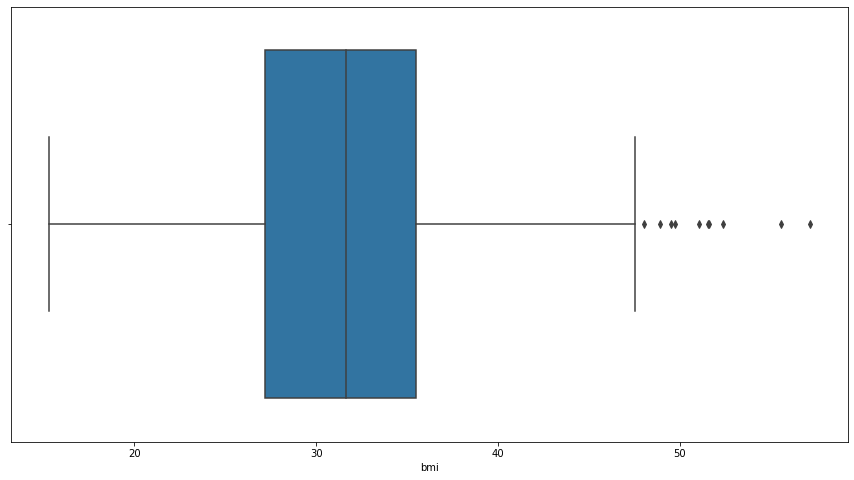

In [3]:
plt.figure(figsize=(15,8))
sns.boxplot(df1['bmi'])


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age', ylabel='Density'>

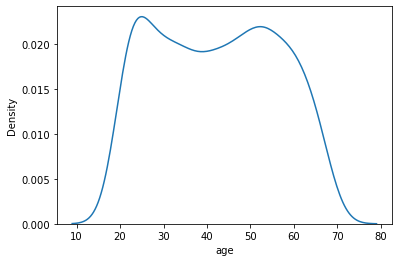

In [4]:
sns.distplot(df1['age'],hist=False)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost', ylabel='Density'>

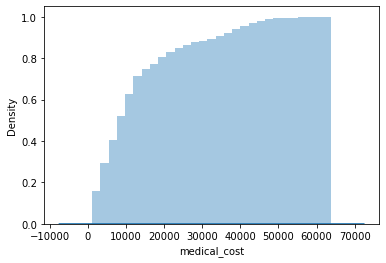

In [5]:
sns.distplot(df1['medical_cost'],hist_kws=dict(cumulative=True))

In [ ]:
#nearly 83%

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

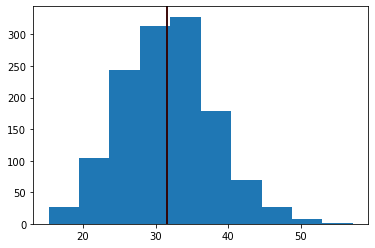

In [16]:
plt.hist(df1['bmi'])
plt.axvline(df1['bmi'].mean(),color='red')
plt.axvline(df1['bmi'].mean(),color='black')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

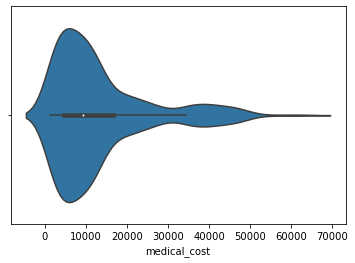

In [17]:
sns.violinplot(df1['medical_cost'])

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df1[(df1['age']<30)&(df1['medical_cost']>40000)]



,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost', ylabel='bmi'>

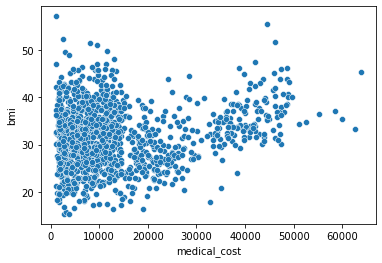

In [7]:
sns.scatterplot(x='medical_cost',y='bmi',data=df1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
mu=df1.groupby(['gender'])['bmi'].mean()
sigma=df1.groupby(['gender'])['bmi'].std()

cv=sigma/np.abs(mu)*100
cv

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='region'>

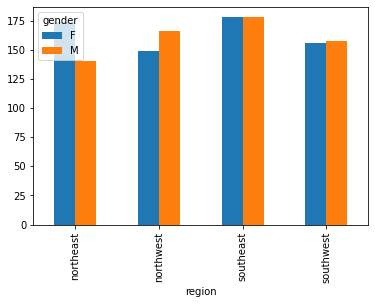

In [26]:
pd.crosstab(df1['region'],df1['gender']).plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

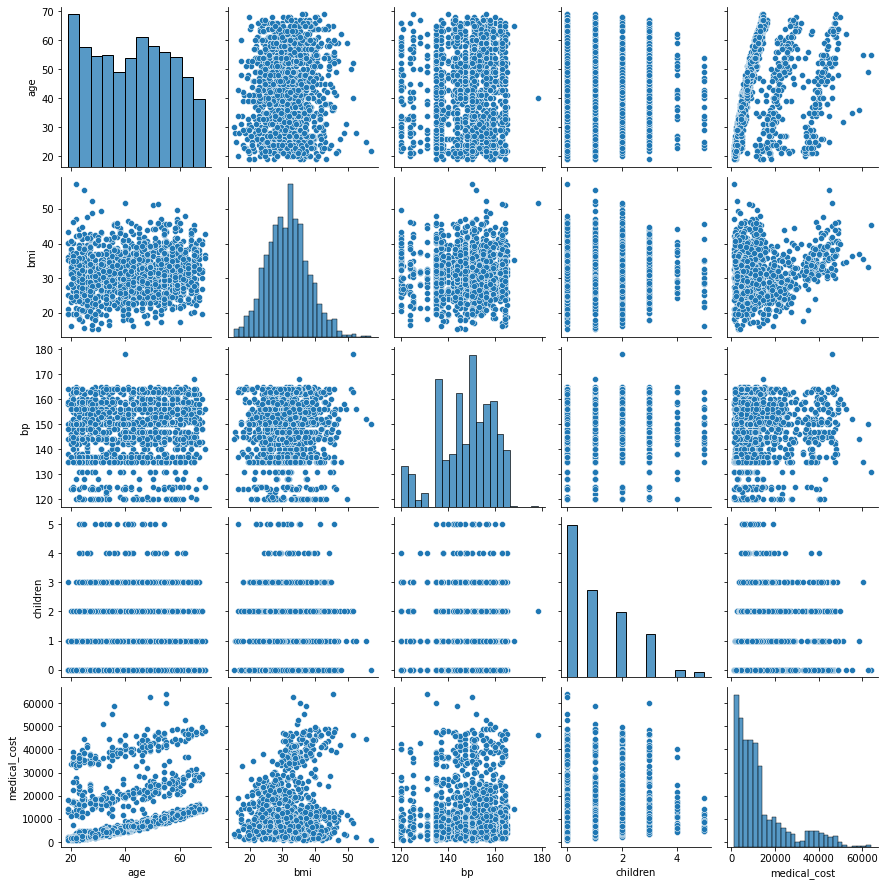

In [29]:
sns.pairplot(df1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
df1.dtypes

age               int64
gender           object
bmi             float64
bp                int64
children          int64
region           object
smoker           object
medical_cost    float64
dtype: object

<AxesSubplot:xlabel='smoker', ylabel='medical_cost'>

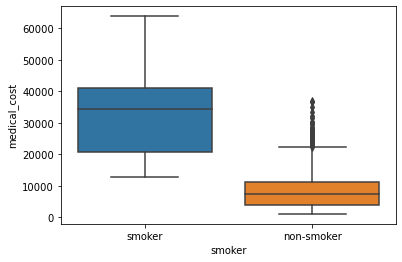

In [32]:
sns.boxplot(df1['smoker'],df1['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age', ylabel='medical_cost'>

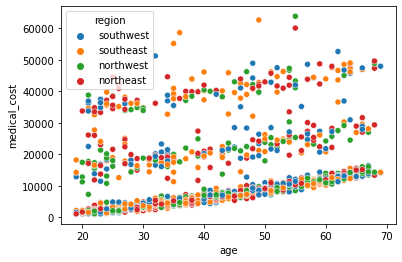

In [34]:
sns.scatterplot('age','medical_cost',hue='region',data=df1)

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df1['region'].value_counts()

southeast    356
northwest    315
northeast    315
southwest    314
Name: region, dtype: int64

In [38]:
pd.get_dummies(df1['region'],drop_first=True).head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
Le=LabelEncoder()

In [12]:
df1['smoker_lebel']=Le.fit_transform(df1['smoker'])

In [13]:
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_lebel
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
fr=df1.groupby('gender').size()

encoder=fr/len(df1)

df1['freq_gender']=df1.gender.map(encoder)

In [17]:
df1

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_lebel,freq_gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
pd.get_dummies(df1['smoker'],drop_first=True)

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1295,0
1296,0
1297,0
1298,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
ss=StandardScaler()

In [7]:
df1['bmi_zscore']=ss.fit_transform(df1[['bmi']])

In [9]:
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,bmi_zscore
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.050142
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.816583
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.538020
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,-1.239588
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,-0.582526


In [11]:
df1['bmi_zscore'].mean()

-5.143535170431662e-16

In [12]:
df1['bmi_zscore'].var()

1.0007698229407238

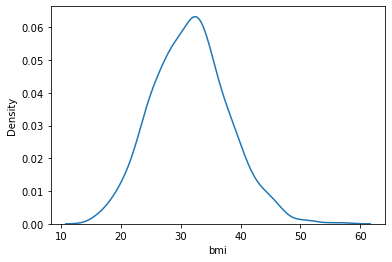

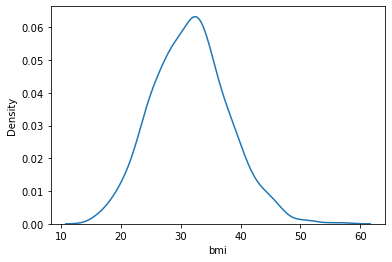

In [10]:
sns.kdeplot(df1['bmi'])
plt.show()
sns.kdeplot(df1['bmi'])
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mim=MinMaxScaler()

In [26]:
df1['age_zscore']=mim.fit_transform(df1[['age']])

In [27]:
df1

,age,gender,bmi,bp,children,region,smoker,medical_cost,bmi_zscore,age_zscore
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.050142,0.08
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.816583,0.02
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.538020,0.28
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,-1.239588,0.36
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,-0.582526,0.34
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,-0.096222,0.70
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0.525430,0.06
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0.514413,0.04
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,-1.067257,0.06


In [34]:
df1['age_zscore'].min()

0.0

In [35]:
df1['age_zscore'].max()

1.0

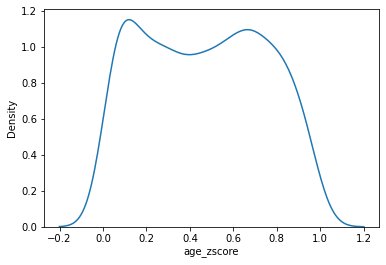

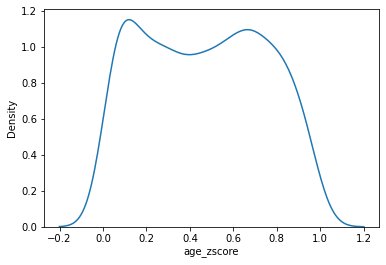

In [36]:
sns.kdeplot(df1['age_zscore'])
plt.show()
sns.kdeplot(df1['age_zscore'])
plt.show()

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
df2=pd.read_csv('health_insurance.csv')
df2

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [55]:
df2['LOG medical'] = np.log(df1['medical_cost'])
df2

,age,gender,bmi,bp,children,region,smoker,medical_cost,LOG medical
0,23,M,31.900,157,0,southwest,smoker,16884.92400,9.734176
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,7.453302
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,8.400538
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,9.998092
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,9.268661
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,7.698927
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,7.396233
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,7.604867


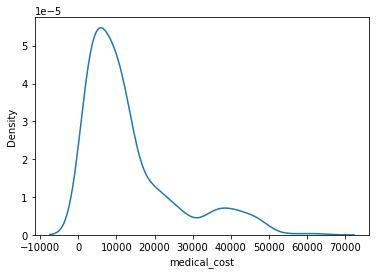

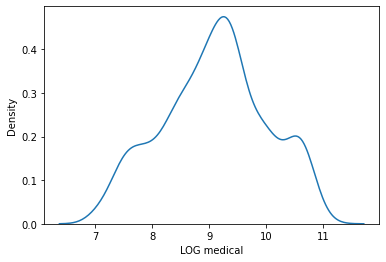

In [57]:
sns.kdeplot(df2['medical_cost'])
plt.show()
sns.kdeplot(df2['LOG medical'])
plt.show()


In [59]:
print("Skewness for Original medical_cost Column is",df2['medical_cost'].skew())
print("Skewness for LOG Transformed medical_cost Column is",df2['LOG medical'].skew())

Skewness for Original medical_cost Column is 1.5341854555059413
Skewness for LOG Transformed medical_cost Column is -0.09331493541417475


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [61]:
df2['medical_cost_org']=np.exp(df2['LOG medical'])

In [62]:
df2

,age,gender,bmi,bp,children,region,smoker,medical_cost,LOG medical,medical_cost_org
0,23,M,31.900,157,0,southwest,smoker,16884.92400,9.734176,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,7.453302,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,8.400538,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,9.998092,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,8.260197,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,9.268661,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,7.698927,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,7.396233,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,7.604867,2007.94500


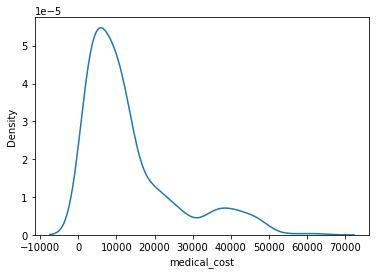

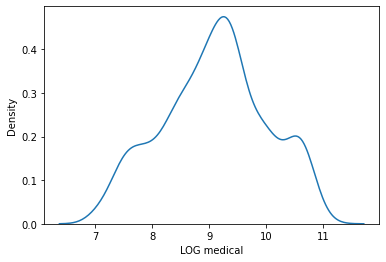

<AxesSubplot:xlabel='medical_cost_org', ylabel='Density'>

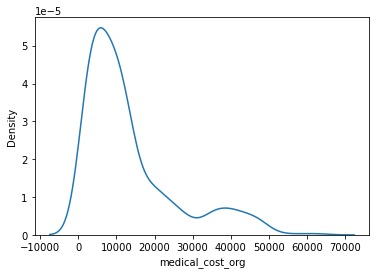

In [63]:
sns.kdeplot(df2['medical_cost'])
plt.show()
sns.kdeplot(df2['LOG medical'])
plt.show()
sns.kdeplot(df2['medical_cost_org'])